#Carga de librerias

In [2]:
#!pip install requests    #Hacer llamadas http a paginas de la red
#!pip install tsplib95    #Modulo para las instancias del problema del TSP

!pip install requests                     #Hacer llamadas http a paginas de la red
!pip install tabulate>=0.9 networkx>=3.0  # Actualiza las librerías 'tabulate' y 'networkx' a version compatibles con tsplib95
                                          # tabulate: Ayuda a crear tablas de texto legibles para presentar datos.
                                          # networkx:  Sirve para trabajar con grafos y redes, y realizar análisis sobre estas estructuras.
!pip install tsplib95 --no-deps           #Modulo para las instancias del problema del TSP

#Carga de los datos del problema

In [3]:
import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios


#http://elib.zib.de/pub/mp-testdata/tsp/tsplib/
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/

#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)




gzip: swiss42.tsp already exists; do you wish to overwrite (y or n)? y


In [4]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())



In [5]:
Aristas

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),



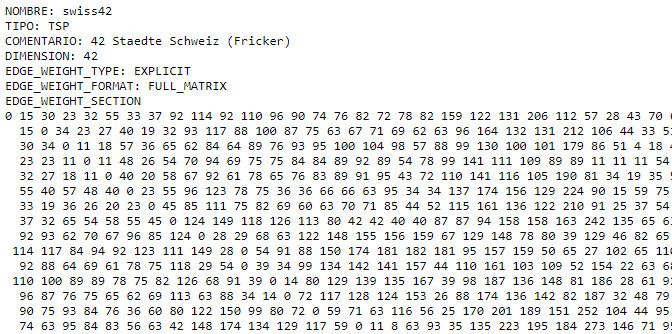

In [6]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(0, 1)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

15

#Funcionas basicas


In [7]:

#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)

distancia_total(sol_temporal, problem), sol_temporal

(4640,
 [0,
  32,
  22,
  40,
  4,
  13,
  3,
  10,
  35,
  15,
  25,
  6,
  14,
  12,
  8,
  38,
  21,
  39,
  2,
  29,
  34,
  37,
  28,
  7,
  27,
  20,
  9,
  33,
  30,
  17,
  18,
  23,
  41,
  5,
  31,
  26,
  36,
  19,
  24,
  1,
  16,
  11])

#BUSQUEDA ALEATORIA

In [8]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 10000)

Mejor solución: [0, 24, 40, 23, 6, 3, 7, 16, 5, 31, 36, 17, 38, 2, 37, 15, 28, 8, 11, 41, 12, 33, 20, 21, 39, 9, 22, 34, 19, 14, 4, 27, 25, 18, 35, 26, 32, 13, 1, 30, 10, 29]
Distancia     : 3669


#BUSQUEDA LOCAL

In [9]:
###############################################################################
# BUSQUEDA LOCAL
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3669
Distancia Mejor Solucion Local: 3379


In [10]:
#Busqueda Local:
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(problem):
  mejor_solucion = []

  #Generar una solucion inicial de referencia(aleatoria)
  solucion_referencia = crear_solucion(Nodos)
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(problem )

En la iteracion  44 , la mejor solución encontrada es: [0, 6, 26, 5, 13, 19, 14, 16, 15, 37, 7, 1, 32, 34, 33, 20, 35, 36, 17, 31, 8, 23, 41, 10, 25, 11, 12, 18, 4, 3, 27, 2, 28, 29, 30, 38, 22, 39, 24, 40, 21, 9]
Distancia     : 1558


#SIMULATED ANNEALING


In [11]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [12]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 27, 3, 1, 17, 37, 16, 14, 15, 19, 28, 29, 26, 18, 12, 41, 9, 22, 38, 36, 31, 35, 20, 33, 34, 32, 30, 8, 10, 11, 25, 23, 21, 40, 24, 39, 2, 4, 6, 5, 13, 7]
con una distancia total de 2038


In [70]:
import random
import math

# Generador de vecino utilizando el operador 2-opt

def generar_vecino_2opt(solucion):
    """Genera un vecino invirtiendo un segmento aleatorio de la solución."""
    a, b = sorted(random.sample(range(len(solucion)), 2))
    return solucion[:a] + solucion[a:b][::-1] + solucion[b:]

# Esquema de enfriamiento exponencial

def bajar_temperatura(temperatura, alpha=0.995):
    """Disminuye la temperatura exponencialmente."""
    return temperatura * alpha

# Función de cálculo de distancia

def distancia_total(solucion, problem):
    """Calcula la distancia total de una solución incluyendo el regreso al nodo inicial."""
    return sum(problem.get_weight(solucion[i], solucion[i + 1]) for i in range(len(solucion) - 1)) + problem.get_weight(solucion[-1], solucion[0])

# Recocido simulado optimizado

def recocido_simulado(problem, temperatura_inicial, max_iteraciones=15000, reinicio_max=500):
    """Optimización del TSP usando recocido simulado simplificado y eficiente."""
    solucion_actual = list(problem.get_nodes())
    random.shuffle(solucion_actual)
    mejor_solucion = solucion_actual[:]
    mejor_distancia = distancia_total(solucion_actual, problem)

    iteracion = 0
    sin_mejora = 0

    while temperatura_inicial > 1e-4 and iteracion < max_iteraciones:
        iteracion += 1

        # Generar vecino usando 2-opt
        vecino = generar_vecino_2opt(solucion_actual)
        distancia_vecino = distancia_total(vecino, problem)

        # Aceptar vecino según criterio
        if distancia_vecino < mejor_distancia or random.random() < math.exp((mejor_distancia - distancia_vecino) / temperatura_inicial):
            solucion_actual = vecino[:]
            mejor_distancia = distancia_vecino
            mejor_solucion = vecino[:]
            sin_mejora = 0  # Reiniciar el contador de estancamiento
        else:
            sin_mejora += 1

        # Enfriar temperatura
        temperatura_inicial = bajar_temperatura(temperatura_inicial)

        # Reinicio guiado si no hay mejoras
        if sin_mejora >= reinicio_max:
            solucion_actual = generar_vecino_2opt(mejor_solucion)  # Perturbar mejor solución
            sin_mejora = 0
            print(f"Reinicio guiado en iteración {iteracion}")

        # Reportar progreso cada 100 iteraciones
        if iteracion % 100 == 0:
            print(f"Iteración {iteracion}: Mejor distancia = {mejor_distancia}, Temperatura = {temperatura_inicial:.4f}")

    print("\nLa mejor solución encontrada es:", mejor_solucion)
    print("Con una distancia total de:", mejor_distancia)
    return mejor_solucion

# Ejecutar el recocido simulado con el problema cargado
sol = recocido_simulado(problem, 500000)


Iteración 100: Mejor distancia = 5045, Temperatura = 302885.2182
Iteración 200: Mejor distancia = 5039, Temperatura = 183478.9109
Iteración 300: Mejor distancia = 5175, Temperatura = 111146.0999
Iteración 400: Mejor distancia = 5121, Temperatura = 67329.0215
Iteración 500: Mejor distancia = 4585, Temperatura = 40785.9307
Iteración 600: Mejor distancia = 5147, Temperatura = 24706.9111
Iteración 700: Mejor distancia = 5263, Temperatura = 14966.7163
Iteración 800: Mejor distancia = 4899, Temperatura = 9066.3943
Iteración 900: Mejor distancia = 4449, Temperatura = 5492.1536
Iteración 1000: Mejor distancia = 4384, Temperatura = 3326.9843
Iteración 1100: Mejor distancia = 4826, Temperatura = 2015.3887
Iteración 1200: Mejor distancia = 4517, Temperatura = 1220.8629
Iteración 1300: Mejor distancia = 4666, Temperatura = 739.5627
Iteración 1400: Mejor distancia = 5114, Temperatura = 448.0052
Iteración 1500: Mejor distancia = 4929, Temperatura = 271.3883
Iteración 1600: Mejor distancia = 4570, Te

#Representación en un grafo a partir de la matriz de distancias( Optimización de posiciones usando escalado multidimensional (MDS)



Multidimensional scaling problem(MDS):   https://en.wikipedia.org/wiki/Multidimensional_scaling

In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS  # Multidimensional Scaling o Escalado Multidimensional

def plot_tsp_solution(distance_matrix, tsp_solution):
    """
    Dibuja el grafo de un TSP con las posiciones calculadas mediante MDS y muestra
    solo las aristas correspondientes a la solución del TSP.

    :param distance_matrix: np.ndarray, matriz de distancias entre nodos
    :param tsp_solution: list, lista de nodos en el orden de la solución del TSP
    """
    # Crear el grafo completo
    G = nx.Graph()
    num_nodes = len(distance_matrix)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            G.add_edge(i, j, weight=distance_matrix[i][j])

    # Usar MDS para calcular posiciones de los nodos
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)

    # Convertir las posiciones en un diccionario para networkx
    pos = {i: positions[i] for i in range(num_nodes)}

    # Crear un subgrafo con las aristas del camino TSP
    TSP_G = nx.Graph()
    for i in range(len(tsp_solution) - 1):
        u = tsp_solution[i]
        v = tsp_solution[i + 1]
        TSP_G.add_edge(u, v, weight=distance_matrix[u][v])

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Dibujar las aristas del camino TSP
    nx.draw_networkx_edges(TSP_G, pos, edge_color='red', width=2)

    # Añadir etiquetas a los nodos y pesos de las aristas
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(TSP_G, 'weight')
    nx.draw_networkx_edge_labels(TSP_G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Grafo TSP con solución específica")
    plt.show()


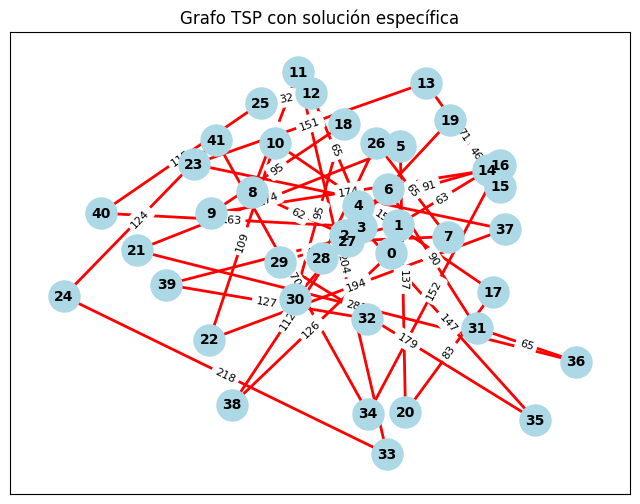

In [15]:
plot_tsp_solution(problem.edge_weights, crear_solucion(Nodos))

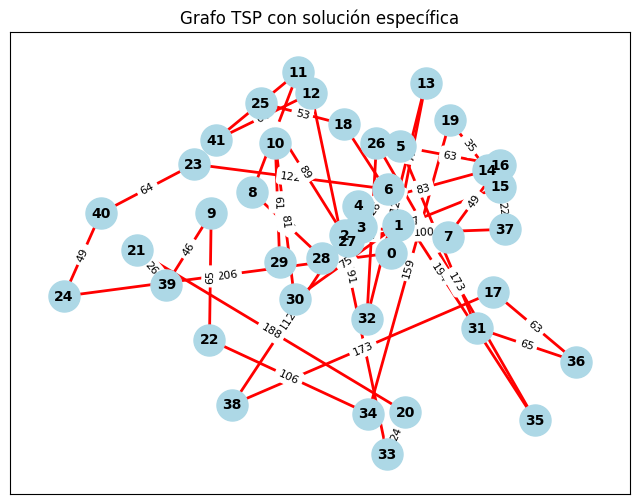

In [16]:
plot_tsp_solution(problem.edge_weights, solucion)